# BLG 527E - Machine Learning
## Term Project

In [3]:
#import neccessary libraries
import warnings
import os
warnings.filterwarnings('ignore')

#libraries for data analysis
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import norm
import tensorflow as tf

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#show all row and column values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

2022-12-18 12:12:25.957367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Description
### Citation Knowledge with Position Dataset

This dataset contains information from scientific publications written by authors who have published papers in the RecSys conference. It contains four files which have information extracted from scientific publications. The details of each file are explained below:

i) all_authors.tsv: This file contains the details of authors who published research papers in the RecSys conference. The details include authors' identifier in various forms, such as number, orcid id, dblp url, dblp key and google scholar url, authors' first name, last name and their affiliation (where they work)

ii) all_publications.tsv: This file contains the details of publications authored by the authors mentioned in the all_authors.tsv file (Please note the list of publications does not contain all the authored publications of the authors, refer to the publication for further details).

The details include publications' identifier in different forms (such as number, dblp key, dblp url, dblp key, google scholar url), title, filtered title, published date, published conference and paper abstract.

iii) selected_author_publications_information.tsv: This file consists of identifiers of authors and their publications. Here, we provide the information of selected authors and their publications used for our experiment.

iv) selected_publication_citations_information.tsv: This file contains the information of the selected publications which consists of both citing and cited papers’ information used in our experiment. It consists of identifier of citing paper, identifier of cited paper, citation title, citation filtered title, the sentence before the citation is mentioned, citing sentence, the sentence after the citation is mentioned, citation position (section).

Please note, it does not contain information of all the citations cited in the publications. For more detail, please refer to the paper.

This dataset is for the use of research purposes only and if you use this dataset, please cite our paper "Capturing and exploiting citation knowledge for recommending recently published papers".

https://ieeexplore.ieee.org/abstract/document/9338486

In [10]:
#read data from .tsv files
df_all_authors = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/all_authors.tsv", sep='\t', encoding= 'ISO-8859-1')
df_all_publications = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/all_publications.tsv", sep='\t')
df_selected_author_publications = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/selected_author_publications_information.tsv", sep='\t')
df_selected_publication_citations = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/selected_publication_citations_information.tsv", sep='\t')


### Data Exploration

In [87]:
#Author Data
print(df_all_authors.columns)
print(df_all_authors.shape)
df_all_authors.head(3)
df_all_authors.tail(1)
df_all_authors['author_page'].head(20)



Index(['author_id', 'author_dblp_url', 'author_dblp_key',
       'author_gscholar_url', 'author_affiliation', 'author_page'],
      dtype='object')
(1931, 6)


0                                                      
1     http://www.di.uniba.it/~swap/index.php?n=Membr...
2                                                      
3                                                      
4                                                      
5     author's page @ wordpress.comGoogle Scholar pr...
6                               author's page @ msu.edu
7                                                      
8                                                      
9                                                      
10                                                     
11            http://www.ifi.uzh.ch/ddis/bernstein.html
12                                                     
13                                                     
14                                                     
15                                                     
16                       http://www.comp.ita.br/~cunha/
17    author's page @ microsoft.comGoogle Schola

In [58]:
#Author Data
print(df_all_authors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931 entries, 0 to 1930
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   author_id            1931 non-null   int64 
 1   author_dblp_url      1931 non-null   object
 2   author_dblp_key      1931 non-null   object
 3   author_gscholar_url  1931 non-null   object
 4   author_affiliation   379 non-null    object
 5   author_page          1931 non-null   object
dtypes: int64(1), object(5)
memory usage: 90.6+ KB
None


In [125]:
#All Publications Data
print(df_all_publications.columns)
print(df_all_publications.shape)
df_all_publications.head(5)
#df_all_publications.tail(1)
#df_all_publications["paper_published_conference"].head(10)
paper_id = 5
df_all_publications.index[df_all_publications['paper_id'] == paper_id].tolist()[0]

Index(['paper_id', 'paper_dblp_key', 'paper_title', 'paper_filtered_title',
       'paper_published_date', 'paper_published_conference',
       'paper_gscholar_url', 'paper_dblp_url', 'paper_abstract'],
      dtype='object')
(35473, 9)


2

In [60]:
#All Publications Data
print(df_all_publications.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35473 entries, 0 to 35472
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   paper_id                    35473 non-null  int64 
 1   paper_dblp_key              35473 non-null  object
 2   paper_title                 35473 non-null  object
 3   paper_filtered_title        35473 non-null  object
 4   paper_published_date        35473 non-null  int64 
 5   paper_published_conference  35473 non-null  object
 6   paper_gscholar_url          35473 non-null  object
 7   paper_dblp_url              35473 non-null  object
 8   paper_abstract              35473 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.4+ MB
None


In [67]:
#Selected Author Publications Data
print(df_selected_author_publications.columns)
print(df_selected_author_publications.shape)
print(df_selected_author_publications.head(5))
print(df_selected_author_publications.tail(1))

Index(['author', 'publication'], dtype='object')
(17637, 2)
   author  publication
0       4          173
1       4          174
2       4          175
3       4          176
4       4          177
       author  publication
17636    1928        80807


In [17]:
#Selected Author Publications Data
print(df_selected_author_publications.info())

#There are 547 authors in this dataset.
print(len(df_selected_author_publications['author'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17637 entries, 0 to 17636
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   author       17637 non-null  int64
 1   publication  17637 non-null  int64
dtypes: int64(2)
memory usage: 275.7 KB
None
547


In [92]:
#Selected Publication Citations Data
print(df_selected_publication_citations.columns)
print(df_selected_publication_citations.shape)
#print(df_selected_publication_citations['citation_sentence_before'].iloc[0])
print(df_selected_publication_citations['citation_sentence_cited'].iloc[1])
#print(df_selected_publication_citations['citation_sentence_after'].iloc[0])
df_selected_publication_citations.head(5)

# Ex 0: Paper #1 quoted paper 5835. Citation title etc information belongs to paper number 5835.

Index(['citing_paper_id', 'cited_paper_id', 'citation_title',
       'citation_filtered_title', 'citation_sentence_before',
       'citation_sentence_cited', 'citation_sentence_after',
       'citation_position (section)'],
      dtype='object')
(14287, 8)
another content based explanation approach is provided in where the model lists properties the recommended artworks had in common with artworks the user had previously rated positively


,citing_paper_id,cited_paper_id,citation_title,citation_filtered_title,citation_sentence_before,citation_sentence_cited,citation_sentence_after,citation_position (section)
0,1,5835,Deep neural networks for youtube recommendations,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...,Introduction
3,2,12097,The effects of transparency on trust in and ac...,the effects of transparency on trust in and ac...,in the system provided a tag based explanation...,another content based explanation approach is ...,the authors establi shed that explaining why a...,Related_Work
4,2,42695,Explaining collaborative filtering recommendat...,explaining collaborative filtering recommendat...,the importance of providing information system...,however the first attempt towards the exploita...,more recently on different explanation goals,Related_Work
5,2,42695,Explaining collaborative filtering recommendat...,explaining collaborative filtering recommendat...,however the first attempt towards the exploita...,more recently on different explanation goals,these explanation goals are inspired by the wo...,Related_Work
6,2,42695,Explaining collaborative filtering recommendat...,explaining collaborative filtering recommendat...,indeed most of the works presented in the lite...,as an example in information about the neighbo...,in that direction in the information retrieval...,Related_Work


In [18]:
#Selected Publication Citations Data
print(df_selected_publication_citations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   citing_paper_id              20652 non-null  int64 
 1   cited_paper_id               20652 non-null  int64 
 2   citation_title               20652 non-null  object
 3   citation_filtered_title      20652 non-null  object
 4   citation_sentence_before     15147 non-null  object
 5   citation_sentence_cited      20617 non-null  object
 6   citation_sentence_after      15793 non-null  object
 7   citation_position (section)  20652 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB
None


## Data Preprocessing

In this section, the operations that may be required for preprocessing the data are shared with an example. These are just a few basics, different preprocessing need to be added if needed.

1.   **Duplicate samples:**
2.   **Non-informative Features:** 
3.   **NA (Not Available) Values:**


--------------------------------

1.   **Duplicate samples:**

In [111]:
print(df_selected_publication_citations.shape)
df_selected_publication_citations.head(5)
#It seems 0,1 & 2 are duplicated rows.

(20652, 8)


,citing_paper_id,cited_paper_id,citation_title,citation_filtered_title,citation_sentence_before,citation_sentence_cited,citation_sentence_after,citation_position (section)
0,1,5835,Deep neural networks for youtube recommendations,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...,Introduction
1,1,5835,Deep neural networks for youtube recommendations,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...,Introduction
2,1,5835,Deep neural networks for youtube recommendations,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...,Introduction
3,2,12097,The effects of transparency on trust in and ac...,the effects of transparency on trust in and ac...,in the system provided a tag based explanation...,another content based explanation approach is ...,the authors establi shed that explaining why a...,Related_Work
4,2,42695,Explaining collaborative filtering recommendat...,explaining collaborative filtering recommendat...,the importance of providing information system...,however the first attempt towards the exploita...,more recently on different explanation goals,Related_Work


In [112]:
#Drop duplicated rows
df_selected_publication_citations.drop_duplicates(inplace=True)

print(df_selected_publication_citations.shape)
df_selected_publication_citations.head(5)

(14287, 8)


,citing_paper_id,cited_paper_id,citation_title,citation_filtered_title,citation_sentence_before,citation_sentence_cited,citation_sentence_after,citation_position (section)
0,1,5835,Deep neural networks for youtube recommendations,deep neural networks for youtube recommendations,though shallow models are generally easy to im...,recently due to the powerful ability of featur...,deep models however are biased to high order i...,Introduction
3,2,12097,The effects of transparency on trust in and ac...,the effects of transparency on trust in and ac...,in the system provided a tag based explanation...,another content based explanation approach is ...,the authors establi shed that explaining why a...,Related_Work
4,2,42695,Explaining collaborative filtering recommendat...,explaining collaborative filtering recommendat...,the importance of providing information system...,however the first attempt towards the exploita...,more recently on different explanation goals,Related_Work
5,2,42695,Explaining collaborative filtering recommendat...,explaining collaborative filtering recommendat...,however the first attempt towards the exploita...,more recently on different explanation goals,these explanation goals are inspired by the wo...,Related_Work
6,2,42695,Explaining collaborative filtering recommendat...,explaining collaborative filtering recommendat...,indeed most of the works presented in the lite...,as an example in information about the neighbo...,in that direction in the information retrieval...,Related_Work


2.   **Non-informative Features:** 


In [30]:
#For this dataset, information such as the name of the author and orcid_id should be dropped, as it will not help the prediction models.
print(df_all_authors.shape)
df_all_authors.head(3)

(1931, 9)


,author_id,author_orchid_id,author_fname,author_lname,author_dblp_url,author_dblp_key,author_gscholar_url,author_affiliation,author_page
0,1,,Jinkai,Yu,https://dblp.org/pid/227/0764,homepages/227/0764,https://scholar.google.com/scholar?q=Jinkai+Yu,NaN,
1,2,0000-0002-6866-9451,Pasquale,Lops,https://dblp.org/pers/hb/l/Lops:Pasquale.html,homepages/78/5518,https://scholar.google.com/scholar?q=Pasquale+...,"University of Bari ""Aldo Moro"", Italy",http://www.di.uniba.it/~swap/index.php?n=Membr...
2,3,,A.,Yagci,https://dblp.org/pid/16/7955,homepages/16/7955,https://scholar.google.com/scholar?q=A.+Murat+...,NaN,


In [31]:
drop_list= ['author_orchid_id', 'author_fname', 'author_lname']
df_all_authors.drop(drop_list, axis=1, inplace=True)

print(df_all_authors.shape)
df_all_authors.head(3)

(1931, 6)


,author_id,author_dblp_url,author_dblp_key,author_gscholar_url,author_affiliation,author_page
0,1,https://dblp.org/pid/227/0764,homepages/227/0764,https://scholar.google.com/scholar?q=Jinkai+Yu,NaN,
1,2,https://dblp.org/pers/hb/l/Lops:Pasquale.html,homepages/78/5518,https://scholar.google.com/scholar?q=Pasquale+...,"University of Bari ""Aldo Moro"", Italy",http://www.di.uniba.it/~swap/index.php?n=Membr...
2,3,https://dblp.org/pid/16/7955,homepages/16/7955,https://scholar.google.com/scholar?q=A.+Murat+...,NaN,


3.   **NA (Not Available) Values:**


In [23]:
print(df_all_authors.shape)
df_all_authors.isna().sum()

#In 1931 samples, all values are available for all other features, while 1552 (quite a lot) are NA for 'author_affiliation'. 
#If only this data is to be used, this feature should be removed from the dataset.
#If a new dataset is created by establishing a relationship between different datasets, it should be kept in the first stage; then NA conditions should be checked again.

(1931, 6)


author_id                 0
author_dblp_url           0
author_dblp_key           0
author_gscholar_url       0
author_affiliation     1552
author_page               0
dtype: int64

In [24]:
#uncomment, if you want to use
df_all_authors.drop(['author_affiliation'], axis=1, inplace=True)
df_all_authors.isna().sum()

author_id              0
author_dblp_url        0
author_dblp_key        0
author_gscholar_url    0
author_page            0
dtype: int64

In [25]:
print(df_selected_publication_citations.shape)
df_selected_publication_citations.isna().sum()
df_selected_publication_citations.drop(['citation_sentence_after'], axis=1, inplace=True)
df_selected_publication_citations.isna().sum()

(14287, 8)


citing_paper_id                   0
cited_paper_id                    0
citation_title                    0
citation_filtered_title           0
citation_sentence_before       3843
citation_sentence_cited          25
citation_position (section)       0
dtype: int64

In [26]:
print(df_selected_author_publications.shape)
df_selected_author_publications.isna().sum()

(17637, 2)


author         0
publication    0
dtype: int64

In [24]:
print(df_all_publications.shape)
df_all_publications.isna().sum()
df_all_publications.drop(['paper_abstract'], axis=1, inplace=True)
df_all_publications.isna().sum()


(35473, 9)


paper_id                      0
paper_dblp_key                0
paper_title                   0
paper_filtered_title          0
paper_published_date          0
paper_published_conference    0
paper_gscholar_url            0
paper_dblp_url                0
dtype: int64

In [27]:
#read data from .tsv files
df_all_authors = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/all_authors.tsv", sep='\t', encoding= 'ISO-8859-1')
df_all_publications = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/all_publications.tsv", sep='\t')
df_selected_author_publications = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/selected_author_publications_information.tsv", sep='\t')
df_selected_publication_citations = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/selected_publication_citations_information.tsv", sep='\t')

## Handling Text Data



1. **SBERT - Sentence Trasformers:** 

 [https://huggingface.co/sentence-transformers](https://huggingface.co/sentence-transformers)


2.   **Universal Sentence Encoder**

 [https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder](https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder)



In [96]:

df_all_publications['paper_abstract']


df_all_publications['paper_abstract'] = df_all_publications['paper_abstract'].astype(str).map(lambda x: x.lstrip('[').rstrip(']'))
paper_abstract = df_all_publications['paper_abstract'].values.tolist()

#uncomment, if you want to have a look to abstracts of the papers
len(paper_abstract)
paper_abstract[2]
#df_all_publications['paper_abstract']



'Although very effective in computing accurate recommendations , due to their inner nature, collaborative algorithms work very well with dense matrices but show their limits when they deal with sparse ones. In these cases, using only past ratings may lead to unsatisfactory results in the recommendation list. In this paper we show how to move from a user-item to a user-feature matrix by exploiting original, user ratings. We then use matrix factorization techniques to compute recommendations .'

1. **SBERT - Sentence Trasformers:** 
* For pre-trained models, please check link below:
[https://www.sbert.net/docs/pretrained_models.html](https://www.sbert.net/docs/pretrained_models.html)

--------------------------------

In [28]:
!pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 85 kB 1.3 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 4.0 MB 2.3 MB/s            
     |████████████████████████████████| 881.9 MB 47 kB/s              
     |████████████████████████████████| 23.3 MB 12.1 MB/s            
     |████████████████████████████████| 1.5 MB 14.5 MB/s            
     |████████████████████████████████| 1.3 MB 16.6 MB/s            
     |████████████████████████████████| 67 kB 8.0 MB/s             
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached dataclasses-0.8-py3-none-any.whl (19 kB)
     |████████████████████████████████| 880 kB 15.5 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.6 MB 14.6 MB/s            
     |████████████████████████████████| 756 kB 16.0 MB/s            
     |████████████████████████████████|

In [6]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util
model = SentenceTransformer('all-MiniLM-L6-v2')


#For other pre-trained models, please check link below:
#https://www.sbert.net/docs/pretrained_models.html


#Examples
query_embedding = model.encode('How big is London')
passage_embedding = model.encode(['London has 9,787,426 inhabitants at the 2011 census',
                                  'London is known for its finacial district'])

print(query_embedding.shape)
print(passage_embedding.shape)

print("Similarity:", util.dot_score(query_embedding, passage_embedding))

(384,)
(2, 384)
Similarity: tensor([[0.5627, 0.5645]])


In [33]:
sentence_embeddings = model.encode(paper_abstract[0:10])

In [34]:
#Embedding Dimension: 384
#Sample size: 10
sentence_embeddings.shape

(10, 384)

2.   **Universal Sentence Encoder**

In [47]:
import tensorflow_hub as hub
import tensorflow as tf

In [39]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

2022-12-17 20:08:04.666747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 20:08:04.667867: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [53]:
#An example
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding",
        "The quick brown fox jumps over the lazy dog.",
            "The quick brown fox jumps over the lazy dog."])

query_embedding = embed(['How big is London'])
passage_embedding = embed(['London has 9,787,426 inhabitants at the 2011 census',
                                  'London is a city known for its size.'])

print(embeddings)
print(embeddings.shape)

print(query_embedding.shape)
print(passage_embedding.shape)

corr = np.inner(query_embedding, passage_embedding)

print("Corr:", corr)

tf.Tensor(
[[-0.03133016 -0.06338634 -0.01607502 ... -0.0324278  -0.04575742
   0.05370456]
 [ 0.05080863 -0.01652431  0.01573779 ...  0.00976659  0.03170118
   0.01788118]
 [-0.03133016 -0.06338634 -0.01607502 ... -0.0324278  -0.04575742
   0.05370456]
 [-0.03133016 -0.06338634 -0.01607502 ... -0.0324278  -0.04575742
   0.05370456]], shape=(4, 512), dtype=float32)
(4, 512)
(1, 512)
(2, 512)
Corr: [[0.33827376 0.64562744]]


In [54]:
embeddings = embed(paper_abstract[0:10])

In [56]:
#Embedding Dimension: 512
#Sample size: 10
embeddings.shape

TensorShape([10, 512])

## Clustering of Papers by subject

In this section, you are expected to find a clustering model that will place papers on similar topics in the same cluster using the contents of the papers.You may use the paper abstracts in the dataset for this. You can also obtain additional information about any paper from the shared url's. How you create the dataset is up to you. Note that you need to select features that will aid clustering by topics.

An example clustering study with SBERT: https://www.sbert.net/examples/applications/clustering/README.html


Things to do:

* Create the dataset to be used in clustering by making use of the shared datasets in this folder.

* Split the dataset as training data & test data (general approach is to separate it as 70% - 30%). **In all clustering methods same training - test datasets must be used.**

* 4 clustering methods are given in the following cells. You need to make the necessary coding right after the cell reserved for the method. You need to train the prediction model on the training data and share the prediction results you obtained on the test data with the visualizations.
 
  Clustering Methods: https://scikit-learn.org/stable/modules/clustering.html


* For each clustering method, you are expected to compare the performance of 3 different text-to-vec pre-trained models. For this, you must choose 2 of the clustering performance evaluation metrics.

  Pre-trained text-to-vec models: [https://www.sbert.net/docs/pretrained_models.html](https://www.sbert.net/docs/pretrained_models.html)

  Clustering Performance Evaluation Metrics: [https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

* To optimize the each clustering method, try at least 3 different values for a hyperparameter of this method.


# Dataset Creation


**Hint:** 

*   With 3 different pre-trained text-to-vec models, 3 different datasets are created.

* Do not repeatedly create these three datasets under each clustering model. Do this at once and save it to a file. In the code cell allocated for each clustering model, first read the data you saved from the file, then complete the other necessary operations.

* Consider also the runtime of pre-trained text-to-vec models and Google Colab resource constraints. With the file you created, it may not be possible to get results from the pre-trained model at once. In this case, divide the dataset into subsets, present them as separate inputs to the pre-trained text-to-vec model and combine the results.

* You may complete the data creation phase with pre-trained text-to-vec models on your own computer or on a different additional hardware source. However, you need to share the created datasets via Google Drive and write the code you have executed in the relevant cell below.


In [264]:
#read data from .tsv files
df_all_authors = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/all_authors.tsv", sep='\t', encoding= 'ISO-8859-1')
df_all_publications = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/all_publications.tsv", sep='\t')
df_selected_author_publications = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/selected_author_publications_information.tsv", sep='\t')
df_selected_publication_citations = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/selected_publication_citations_information.tsv", sep='\t')

In [265]:
# Drop duplicates
df_all_publications.drop_duplicates(inplace=True)
df_selected_publication_citations.drop_duplicates(inplace=True)

# Drop NA's
#
print(df_all_publications.isna().sum())
print(df_selected_publication_citations.isna().sum())
df_selected_publication_citations.drop(['citation_sentence_cited'], axis=1, inplace=True)
df_all_publications.dropna(inplace=True)
print(df_all_publications.isna().sum())


paper_id                         0
paper_dblp_key                   0
paper_title                      0
paper_filtered_title             0
paper_published_date             0
paper_published_conference       0
paper_gscholar_url               0
paper_dblp_url                   0
paper_abstract                2529
dtype: int64
citing_paper_id                   0
cited_paper_id                    0
citation_title                    0
citation_filtered_title           0
citation_sentence_before       3843
citation_sentence_cited          25
citation_sentence_after        3391
citation_position (section)       0
dtype: int64
paper_id                      0
paper_dblp_key                0
paper_title                   0
paper_filtered_title          0
paper_published_date          0
paper_published_conference    0
paper_gscholar_url            0
paper_dblp_url                0
paper_abstract                0
dtype: int64


In [277]:
titles    = []
abstracts = []
confs      = []
citeds    = []
cited_confs = []
cited_abs = []

for cited_idx, title in enumerate(df_selected_publication_citations['citation_filtered_title']):
    paper_id_found = False
    cited_paper_id = df_selected_publication_citations['cited_paper_id'].iloc[cited_idx]   
    paper_id = df_selected_publication_citations["citing_paper_id"].iloc[cited_idx]

    # All publications has not contain paper information for paper_id = 5835
    try:
        citeds.append(title)
        titles.append(df_all_publications['paper_title'].iloc[df_all_publications.index[df_all_publications['paper_id'] == paper_id].tolist()[0]])
        abstracts.append(df_all_publications['paper_abstract'].iloc[df_all_publications.index[df_all_publications['paper_id'] == paper_id].tolist()[0]])
        confs.append(df_all_publications['paper_published_conference'].iloc[df_all_publications.index[df_all_publications['paper_id'] == paper_id].tolist()[0]])
        paper_id_found = True
        cited_confs.append(df_all_publications['paper_published_conference'].iloc[df_all_publications.index[df_all_publications['paper_id'] == cited_paper_id].tolist()[0]])
        cited_abs.append(df_all_publications['paper_abstract'].iloc[df_all_publications.index[df_all_publications['paper_id'] == cited_paper_id].tolist()[0]])
    except:
        if paper_id_found:
            titles.pop()
            abstracts.pop()
            confs.pop()
            citeds.pop()
        continue
        
# Check whether the list lengths are equal to each other
print(len(titles))
print(len(abstracts))
print(len(confs))
print(len(citeds))
print(len(cited_confs))
print(len(cited_abs))

10315
10315
10315
10851
10315
10315


In [282]:
headers = ['paper_title', 'paper_abstract', 'paper_published_conference', 'cited_paper_title', 'cited_paper_published_conference', 'cited_paper_abstract']
df = pd.DataFrame(list(zip(titles, abstracts, confs, citeds, cited_confs, cited_abs)),
               columns = headers)

df['paper_abstract'] = df['paper_abstract'].astype(str).map(lambda x: x.lstrip('[').rstrip(']'))
df['cited_paper_abstract'] = df['cited_paper_abstract'].astype(str).map(lambda x: x.lstrip('[').rstrip(']'))

train_set = df.sample(frac = 0.7)
test_set  = df.drop(train_set.index)

# Check the ratio
print(df.shape)
print(train_set.shape[0] / df.shape[0])
print(test_set.shape[0] / df.shape[0])

df.head(5)
train_set.head(5)

(10315, 6)
0.6999515269025691
0.30004847309743093


,paper_title,paper_abstract,paper_published_conference,cited_paper_title,cited_paper_published_conference,cited_paper_abstract
7835,Semantic Clustering of Social Networks using P...,Classic algorithms for community detection in ...,CORIA,an experimental comparison of click position b...,MFCS,Algorithmic mechanism design considers distrib...
5694,EnsembleLens: Ensemble-based Visual Exploratio...,Fig. 1. EnsembleLens facilitates the explorati...,IEEE Trans. Vis. Comput. Graph.,a survey of music similarity and recommendatio...,Journal of Biomedical Informatics,Drug therapeutic indications and side-effects ...
10067,Stanford WebBase components and applications.,We describe the design and performance of WebB...,ACM Trans. Internet Techn.,impact of listening behavior on music recommen...,Multimedia Tools Appl.,The amount of content on online music streamin...
2345,An analysis of dynamic game strategy of privac...,E-business enterprises provide personalize ser...,IJSTM,improving aggregate recommendation diversity u...,J. Artif. Intell. Res.,We study the problem of Borda Unweighted Coali...
9028,Audiovisual Summarization of Lectures and Meet...,We propose a method for extractive summarizati...,ICMR,text vs space efficient geo search query proce...,NTCIR,"Our team, ', s approach is based on word-embed..."


In [248]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [283]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

print(len(stopwords))

350


In [ ]:
parser = spacy.load("en_core_web_sm")
parser.max_length = 7000000

def call_tokenizer(df):
    df["processed_paper_abstract"] = df["paper_abstract"].apply(spacy_tokenizer)
    df["processed_cited_paper_abstract"] = df["cited_paper_abstract"].apply(spacy_tokenizer)
    return df

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [285]:
from multiprocessing import  Pool

def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [287]:
%time df = parallelize_dataframe(df=train_set, func=call_tokenizer, n_cores=50)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [4]:

#train_set.to_csv('/home/ionur2/Desktop/MSc./BLG527/Project/data/train_set.tsv', sep="\t")
loaded_train_set = pd.read_csv("/home/ionur2/Desktop/MSc./BLG527/Project/data/train_set.tsv", sep='\t')
loaded_train_set.head(5)
#train_set.head(5)

,Unnamed: 0,paper_title,paper_abstract,paper_published_conference,cited_paper_title,cited_paper_published_conference,cited_paper_abstract
0,7835,Semantic Clustering of Social Networks using P...,Classic algorithms for community detection in ...,CORIA,an experimental comparison of click position b...,MFCS,Algorithmic mechanism design considers distrib...
1,5694,EnsembleLens: Ensemble-based Visual Exploratio...,Fig. 1. EnsembleLens facilitates the explorati...,IEEE Trans. Vis. Comput. Graph.,a survey of music similarity and recommendatio...,Journal of Biomedical Informatics,Drug therapeutic indications and side-effects ...
2,10067,Stanford WebBase components and applications.,We describe the design and performance of WebB...,ACM Trans. Internet Techn.,impact of listening behavior on music recommen...,Multimedia Tools Appl.,The amount of content on online music streamin...
3,2345,An analysis of dynamic game strategy of privac...,E-business enterprises provide personalize ser...,IJSTM,improving aggregate recommendation diversity u...,J. Artif. Intell. Res.,We study the problem of Borda Unweighted Coali...
4,9028,Audiovisual Summarization of Lectures and Meet...,We propose a method for extractive summarizati...,ICMR,text vs space efficient geo search query proce...,NTCIR,"Our team, ', s approach is based on word-embed..."


In [5]:

from sentence_transformers import SentenceTransformer
from sentence_transformers import util
model = SentenceTransformer('all-MiniLM-L6-v2')


#For other pre-trained models, please check link below:
#https://www.sbert.net/docs/pretrained_models.html


#Examples
title_embedding = model.encode(loaded_train_set["paper_title"])
abs_embedding = model.encode(loaded_train_set["paper_abstract"])
conf_embedding = model.encode(loaded_train_set["paper_published_conference"])
cited_title_embedding = model.encode(loaded_train_set["cited_paper_title"])
cited_conf_embedding = model.encode(loaded_train_set["cited_paper_published_conference"])
cited_abs_embedding = model.encode(loaded_train_set["cited_paper_abstract"])


In [22]:

print(title_embedding.shape)
embed_train_set = tf.stack(
    [title_embedding,abs_embedding,conf_embedding, cited_title_embedding, cited_conf_embedding, cited_abs_embedding], 0, name='concat'
)
print(embed_train_set.shape)

reshaped_embed_set = tf.reshape(
    embed_train_set, [embed_train_set.shape[1], -1], name=None
)

print(reshaped_embed_set.shape)

(7220, 384)
(6, 7220, 384)
(7220, 2304)


In [23]:
from sklearn.preprocessing import StandardScaler
#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_train_set=pd.DataFrame(scaler.fit_transform(reshaped_embed_set))
print(scaled_train_set.shape)

(7220, 2304)


In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform((scaled_train_set))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
n_pcs= pca.components_.shape[0]
print(pca.components_.shape)

Explained variation per principal component: [5.07589993e-02 1.53609573e-02 6.90444336e-03 ... 6.81701175e-07
 6.65399282e-07 6.48386600e-07]
Cumulative variance explained by principal components: 100.00%
(2304, 2304)


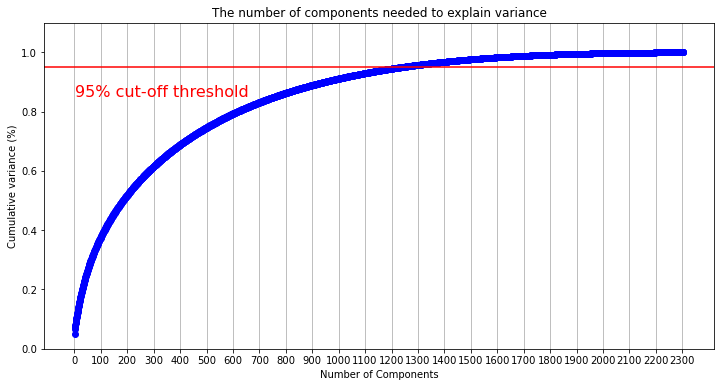

In [40]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, n_pcs+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n_pcs, step=100)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

##Clustering
### K-means
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [ ]:
#Code Below
#You can add as many code cells as you want.

### Spectral Clustering
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [ ]:
#Code Below
#You can add as many code cells as you want.

### DBSCAN
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [ ]:
#Code Below
#You can add as many code cells as you want.

### Gaussian Mixture
 
 Compare 3 different pre-trained text-to-vec models.

 Use 2 performance evaluation metrics and virtualize the results.

 To optimize the method, try at least 3 different values for a hyperparameter of this method.

In [ ]:
#Code Below
#You can add as many code cells as you want.

### The most accurate clustering model you recommend

Present the operations for the selected clustering method and the text-to-vec pre-trained models pair again below.

In [ ]:
#Code Below
#You can add as many code cells as you want.

## Clustering Analysis

**Only for the most accurate clustering model you recommend**,

1.   How many clusters did the model you propose create?
2.   What is the number of papers in each cluster?
3.   What is the unique number of authors in each cluster?
4.   What are the top 3 most frequently used words (the words that describe the cluster) in each cluster?
        
        Ex: https://www.sbert.net/examples/applications/clustering/README.html


In [ ]:
#Code Below
#You can add as many code cells as you want.

## Clustering of Authors

Observe the method you recommended in a different area. Cluster authors by research area.
How you create the dataset is up to you. Note that you need to select features that will aid clustering by research area.

In [ ]:
#Code Below
#You can add as many code cells as you want.

#Students who want to get extra points can also do additional work on the following research areas. This part is not mandatory.

## Semantic Search
 Selecting and presenting the papers closest to the entered text.


*   https://www.sbert.net/examples/applications/semantic-search/README.html
*   https://huggingface.co/course/chapter5/6?fw=pt





In [ ]:
#This part is not mandatory
#Code Below
#You can add as many code cells as you want.

## Academic Ranking of Authors


In [ ]:
#This part is not mandatory
#Code Below
#You can add as many code cells as you want.